# Creating Word Vectors with word2vec

In [1]:
import nltk
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

In [2]:
# nltk.download('punkt')
# nltk.download('gutenberg')

In [3]:
from nltk.corpus import gutenberg

In [4]:
gberg_sents = gutenberg.sents()

In [5]:
gberg_sents[0:4]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.']]

In [6]:
gberg_sents[5]

['Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 ';',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'an',
 'excellent',
 'woman',
 'as',
 'governess',
 ',',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'of',
 'a',
 'mother',
 'in',
 'affection',
 '.']

In [7]:
len(gberg_sents)

98503

### Run word2vec

In [8]:
# model = Word2Vec(sentences=gberg_sents, vector_size=64, sg=1, window=8, min_count=5)
# model.save('model_skip_gram.model')

In [9]:
model = Word2Vec.load('model_skip_gram.model')

In [10]:
model.wv['new']

array([ 0.54218304,  0.16623463, -0.10790369,  0.28785658, -0.05326651,
        0.02024592,  0.44264045,  0.01858599, -0.27353364,  0.2557334 ,
        0.30954838, -0.09824318,  0.28875837, -0.03188015, -0.1512856 ,
        0.33519784,  0.11093987, -0.48762092,  0.38451204,  0.00186242,
        0.35037264,  0.40501395,  0.350147  ,  0.2562661 ,  0.07280956,
        0.3343727 ,  0.25480843,  0.2527206 , -0.31247345, -0.05799347,
        0.21467227, -0.44485137, -0.09331441,  0.54541755, -0.33114648,
       -0.13346279,  0.06916856, -0.22549766,  0.42346346,  0.31375366,
       -0.28777054,  0.02086057,  0.09309427, -0.1529928 , -0.05212669,
       -0.3829827 ,  0.05367883, -0.6553294 , -0.18516965,  0.36509088,
       -0.06672246,  0.31395656,  0.00753034,  0.30804452, -0.03817555,
        0.37068415,  0.2949702 , -0.00779752, -0.0716299 ,  0.2708935 ,
        0.40027133,  0.13606936, -0.16139513,  0.21419173], dtype=float32)

In [11]:
model.wv.most_similar('for')

[('but', 0.7343970537185669),
 ('to', 0.7149506211280823),
 ('in', 0.7002838850021362),
 ('chicken', 0.6793599724769592),
 ('cigars', 0.6755294799804688),
 ('pie', 0.670586884021759),
 ('fun', 0.6681429147720337),
 ('and', 0.6680225133895874),
 ('lunch', 0.6674211621284485),
 ('at', 0.6656293869018555)]

#### Reduce word vector dimensionality with T-SNE

In [12]:
len(model.wv.key_to_index) # Words that met the criteria

17011

In [13]:
X = model.wv[model.wv.key_to_index]

In [14]:
tsne = TSNE()
X_2d = tsne.fit_transform(X)

In [15]:
X_2d[0:5]

array([[ 1.2772301e-01, -4.0541676e+01],
       [ 1.1600295e+00, -4.2272572e+01],
       [ 6.6903877e-01, -4.1712040e+01],
       [-1.3549227e-02, -4.1598724e+01],
       [ 1.2717527e+00, -4.2064560e+01]], dtype=float32)

In [16]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.key_to_index.keys()

In [17]:
coords_df.head()

,x,y,token
0,0.127723,-40.541676,","
1,1.160030,-42.272572,the
2,0.669039,-41.712040,and
3,-0.013549,-41.598724,.
4,1.271753,-42.064560,of


In [18]:
coords_df.to_csv('skip_gram.csv', index=False)

#### Visulaize 2D representation of word vectors

In [19]:
coords_df = pd.read_csv('skip_gram.csv')

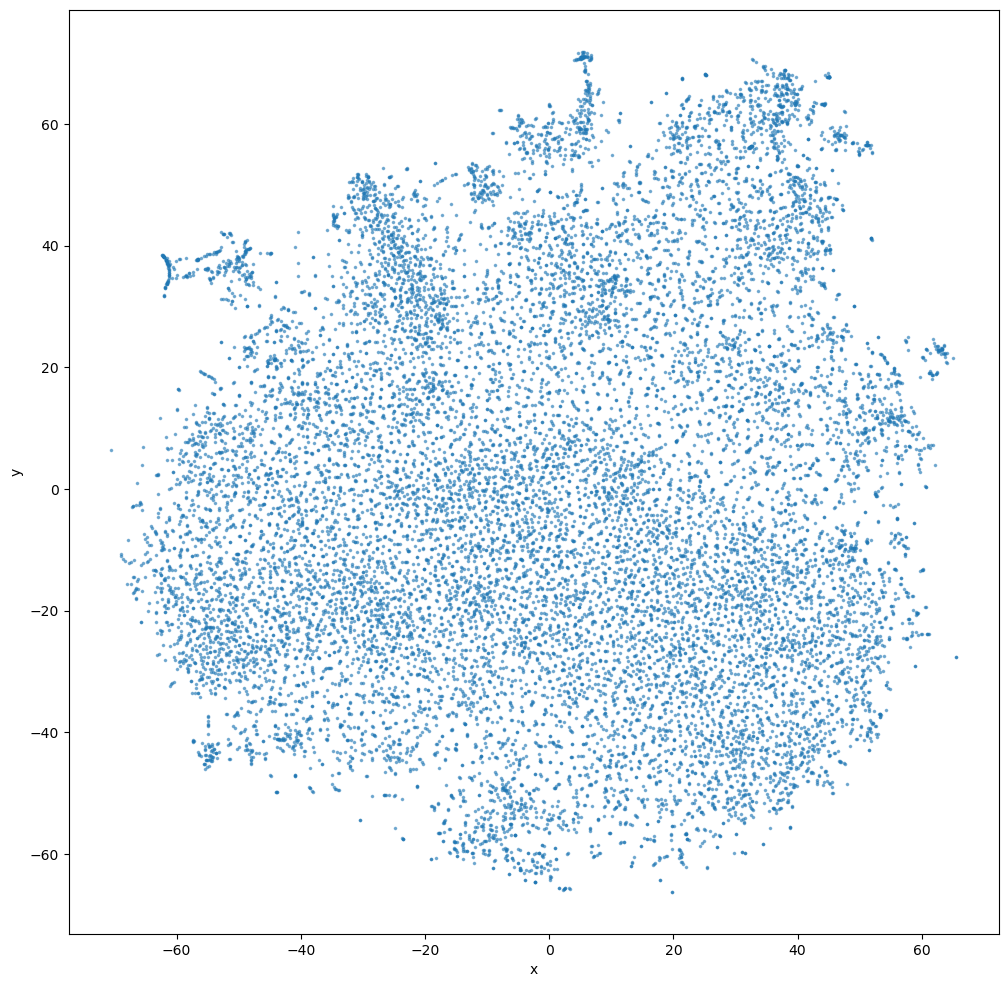

In [20]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12, 12), marker='.', s=10, alpha=0.5)

In [21]:
output_notebook()

Loading BokehJS ...

In [22]:
subset_df = coords_df.sample(n=2500)

In [23]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [24]:
show(p)